In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import font_manager

font_dirs = ['Lato']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Lato'

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('spotify.csv', encoding='latin1')
df.head(20)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",...,30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [4]:
df.shape

(4600, 29)

In [5]:
df.iloc[0:10]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",...,30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


In [6]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
numeric_columns = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']
df[numeric_columns] = df[numeric_columns].replace(',', '', regex=True).apply(pd.to_numeric)
df['All Time Rank'] = pd.to_numeric(df['All Time Rank'].replace(',', '', regex=True), downcast='integer')
df['Explicit Track'] = df['Explicit Track'].replace({0: False, 1: True}).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int16         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

/var/folders/lv/vvf7kstx7655561b3lbhydv40000gn/T/ipykernel_40792/1487686018.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Explicit Track'] = df['Explicit Track'].replace({0: False, 1: True}).astype('category')


In [7]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,NaN,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,NaN,False
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,NaN,True


In [8]:
df.isnull().any()

Track                         False
Album Name                    False
Artist                         True
Release Date                  False
ISRC                          False
All Time Rank                 False
Track Score                   False
Spotify Streams                True
Spotify Playlist Count         True
Spotify Playlist Reach         True
Spotify Popularity             True
YouTube Views                  True
YouTube Likes                  True
TikTok Posts                   True
TikTok Likes                   True
TikTok Views                   True
YouTube Playlist Reach         True
Apple Music Playlist Count     True
AirPlay Spins                  True
SiriusXM Spins                 True
Deezer Playlist Count          True
Deezer Playlist Reach          True
Amazon Playlist Count          True
Pandora Streams                True
Pandora Track Stations         True
Soundcloud Streams             True
Shazam Counts                  True
TIDAL Popularity            

In [9]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [10]:
df.isnull().sum() / len(df)

Track                         0.000000
Album Name                    0.000000
Artist                        0.001087
Release Date                  0.000000
ISRC                          0.000000
All Time Rank                 0.000000
Track Score                   0.000000
Spotify Streams               0.024565
Spotify Playlist Count        0.015217
Spotify Playlist Reach        0.015652
Spotify Popularity            0.174783
YouTube Views                 0.066957
YouTube Likes                 0.068478
TikTok Posts                  0.255000
TikTok Likes                  0.213043
TikTok Views                  0.213261
YouTube Playlist Reach        0.219348
Apple Music Playlist Count    0.121957
AirPlay Spins                 0.108261
SiriusXM Spins                0.461522
Deezer Playlist Count         0.200217
Deezer Playlist Reach         0.201739
Amazon Playlist Count         0.229348
Pandora Streams               0.240435
Pandora Track Stations        0.275652
Soundcloud Streams       

In [11]:
df = df.fillna(np.nan)

In [12]:
df_spotify = df.drop(columns=['TIDAL Popularity', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams'])
df_spotify.head(20)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,2669262.0,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,1118279.0,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,5285340.0,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,11822942.0,False
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,457017.0,True
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,USAT22311371,6,410.1,6.706654e+08,105892.0,175421034.0,83.0,1.311481e+08,1392593.0,4202367.0,2.149435e+08,2.938687e+09,2.867223e+09,138.0,4517131.0,True
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407.2,9.001588e+08,73118.0,201585714.0,86.0,3.087231e+08,4120760.0,NaN,2.958494e+07,5.349153e+08,4.601580e+09,280.0,9990302.0,False
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,QZL382406049,8,375.8,6.750792e+08,40094.0,211236940.0,92.0,2.283826e+08,1439495.0,3500000.0,3.385467e+08,3.804584e+09,2.112582e+09,160.0,6063523.0,True
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,355.7,1.653018e+09,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,USSM12404354,10,330.6,9.067657e+07,10400.0,184199419.0,86.0,3.273524e+07,988682.0,325800.0,1.215745e+08,9.746562e+08,1.747069e+08,191.0,666302.0,True


### Use df_spotify for dataset

In [13]:
df_spotify.describe()

,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts
count,4600,4600.000000,4600.000000,4.487000e+03,4530.000000,4.528000e+03,3796.000000,4.292000e+03,4.285000e+03,3.427000e+03,3.620000e+03,3.619000e+03,3.591000e+03,4039.00000,4.023000e+03
mean,2021-01-27 07:48:18.782608896,2290.678043,41.844043,4.473873e+08,59390.829801,2.334682e+07,63.501581,4.027967e+08,2.930049e+06,9.443076e+05,1.126375e+08,1.161158e+09,3.439601e+08,54.60312,2.529149e+06
min,1987-07-21 00:00:00,1.000000,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,1.000000e+00,1.00000,1.000000e+00
25%,2019-07-16 18:00:00,1144.750000,23.300000,7.038630e+07,6718.000000,4.791612e+06,61.000000,4.073032e+07,4.095490e+05,3.818650e+04,5.814876e+06,5.902786e+07,1.171869e+07,10.00000,2.301950e+05
50%,2022-06-01 00:00:00,2290.500000,29.900000,2.398507e+08,32312.500000,1.325948e+07,67.000000,1.482696e+08,1.257935e+06,1.822000e+05,2.653441e+07,2.659172e+08,9.814272e+07,28.00000,8.545840e+05
75%,2023-08-11 00:00:00,3436.250000,44.425000,6.283638e+08,86038.750000,2.966069e+07,73.000000,4.647882e+08,3.573193e+06,7.948775e+05,9.328418e+07,9.134169e+08,3.114059e+08,70.00000,2.684638e+06
max,2024-06-14 00:00:00,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11,7.289707e+09,859.00000,2.197945e+08
std,NaN,1322.878312,38.543766,5.384439e+08,71131.406625,2.968717e+07,16.186438,7.019000e+08,4.593640e+06,2.442080e+06,5.498123e+08,5.881584e+09,6.704811e+08,71.61227,6.038786e+06


### 1. Basic Data: Top 10 Artists / Songs with Most Spotify Streams, YouTube Views, TikTok Posts (Bar Graph), Year Variation (Line Graph), Average Stream per Song (Table?)

### 2. See which score has the highest correlation to the Spotify Streams (All Time Rank, Track Score, Spotify Popularity) (correlation table)

#### This will be helpful in deciding which score has most relevance with streams and which score needs to be emphasized.

### 3. Correlation between YouTube variables and Spotify vs Tik Tok variables and Spotify (correlation table)

#### This will be helpful in deciding which third pary app to look at when analyzing song performance.

### 4. Compare a song from two artists that were released in the same date vs released in a different date and look into their performances (bar graph)

### 5. Average popularity (using the score metric with the highest correlation in number 2) for songs released per year

#### Will be able to see which year had the most popular songs

In [14]:
# Top 10 Streamed Songs on Spotify and its release data

In [15]:
# Top 10 Streamed Artists on Spotify

In [16]:
# Yearly Users
mau = pd.Series([208,271,345,406,489,602,626])
mau

0    208
1    271
2    345
3    406
4    489
5    602
6    626
dtype: int64

In [17]:
sub = pd.Series([96,124,155,180,205,236,246])
sub

0     96
1    124
2    155
3    180
4    205
5    236
6    246
dtype: int64

In [18]:
x = np.arange(len(mau))

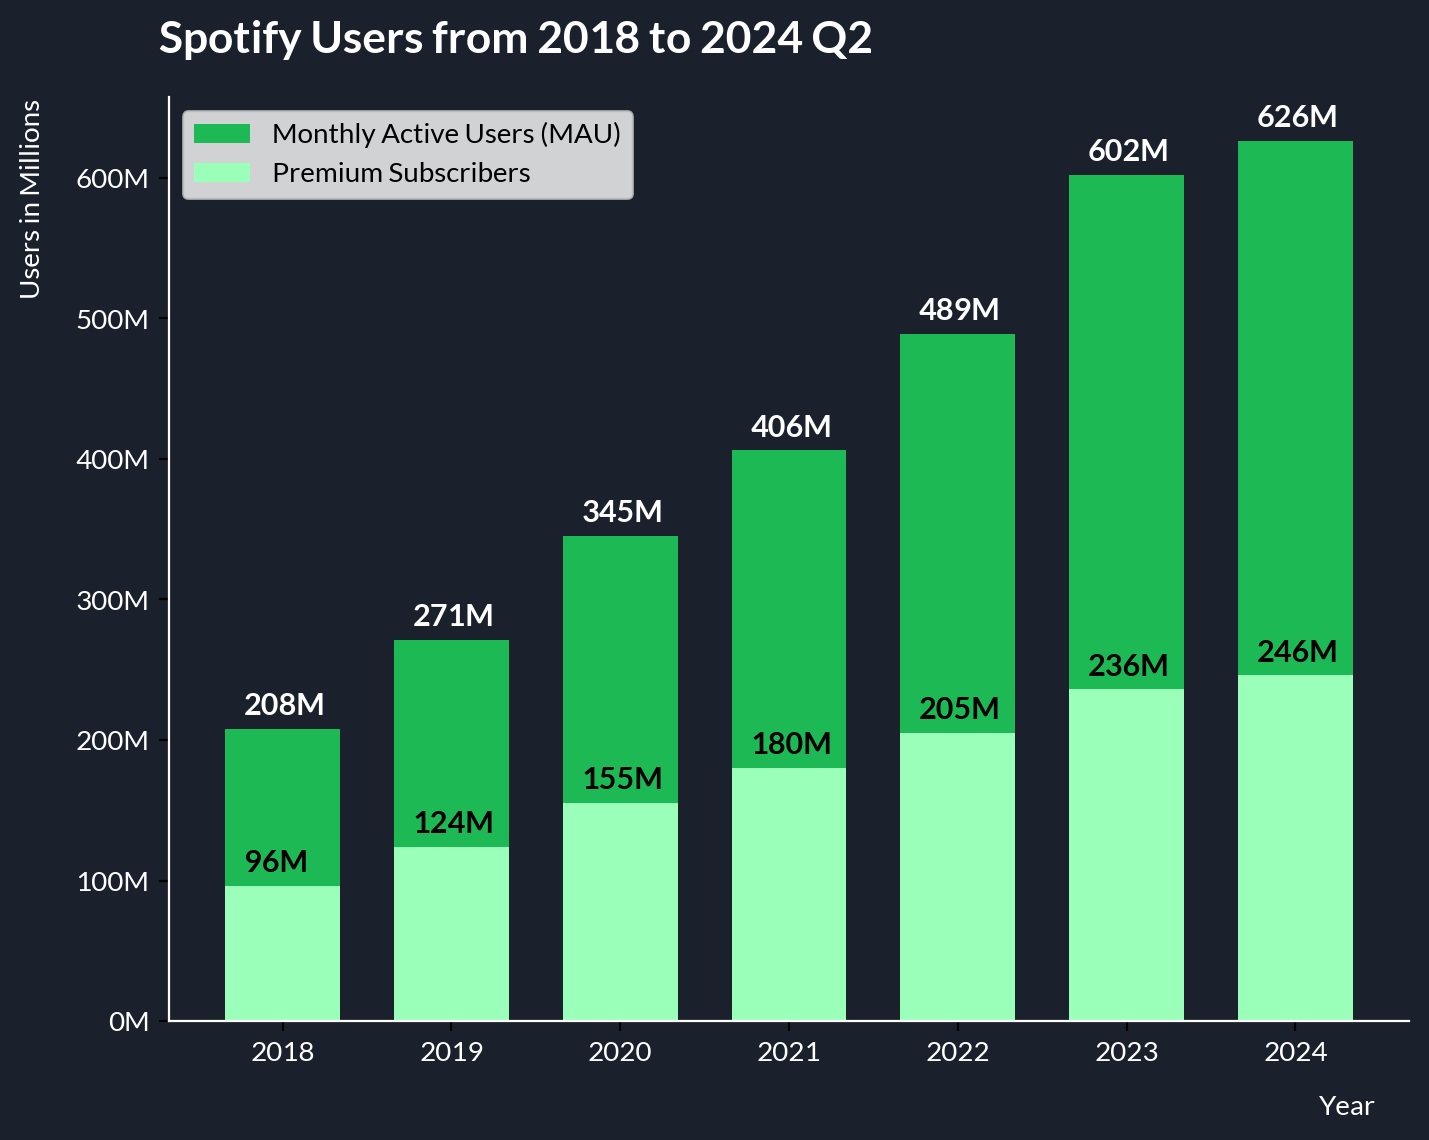

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x, mau, width=0.68, label='Monthly Active Users (MAU)', color='#1DB954')
ax.bar(x, sub, width=0.68, label='Premium Subscribers', color='#99FFB9')

for i, label in enumerate(range(len(mau))):
    ax.annotate(f"{mau.iloc[i]}M", (i-0.23, mau.iloc[i]+10), size=11, annotation_clip=False, color='white', weight='bold')
    ax.annotate(f"{sub.iloc[i]}M", (i-0.23, sub.iloc[i]+10), size=11, annotation_clip=False, color='black', weight='bold')

ax.set_xlabel('Year', color='white')
ax.set_xticks(x)
ax.set_xticklabels([2018,2019,2020,2021,2022,2023,2024], color='white')
ax.set_ylabel('Users in Millions', color='white')
ax.set_yticks(np.arange(0, 700, 100))
ax.set_yticklabels(['0M', '100M', '200M', '300M', '400M', '500M', '600M'], color='white')
ax.set_title('Spotify Users from 2018 to 2024 Q2', color='white', fontsize=16, fontweight='bold', x=0.28, y=1.03)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.set_label_coords(0.95, -0.08)
ax.yaxis.set_label_coords(-0.1, 0.89)
ax.set_facecolor(color='#1b212c')
fig.patch.set_facecolor('#1b212c')
plt.legend()
fig.savefig('Spotify_Users.png', dpi=300, bbox_inches='tight')
plt.show()